In [8]:
# load data
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X2 = X_train.reshape(60000, 784)
X2.shape

(60000, 784)

In [ ]:
# calculate covariance matrix for the whole dataset

In [ ]:
# calculate eigenvalues and digen vectors
# An eigenvector is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it.
# Eigenvalue is the factor by which the eigenvector is scaled.
# Let A be a covariance matrix, v a vector and l a scalar thaat satisfies Av = lv, then l is called eigenvalue associated with eigenvector v of A
# Av-lv=0; (A-l)v=0 -> det(A-l) = 0(because v is a non-zero vector)

In [ ]:
# Sort eigenvalues and their corresponding eigenvectors
# Pick k eigenvalues and form a matrix of eigen vectors
# Transform the feature matrix: Feature matrix*top_k_eigenvectors = Transformd data

In [ ]:
# projection to 2D (matrix multiplication)

In [ ]:
# Plots

In [ ]:
# Examine PCs and PVs

Question 2

In [ ]:
# Sample Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
A = np.random.randint(10, size=(5, 4))
print("A mat", A)
df = pd.DataFrame(A, columns=['f1', 'f2', 'f3', 'f4'])

# Step 2: Normalize the dataset
df_std = (df - df.mean()) / (df.std())
df_std

# Find the corvariance matrix for the given dataset. There are 2 approaches:
# 1. Sample formula
# 2.Population formula
# Note: Any of the formula, can be used result will be same
# Corvariance population formula (divide by N)
df_cov = np.cov(df_std.T, bias=1)
df_cov

# Corvariance sample formula (divide by N-1)
cov_mat = np.cov(df_std.T, bias=0)
cov_mat

# Verify variance(f1) is as expected
print('var(f1) (population formula): ', ((df_std.f1)**2).sum()/5)
print('var(f1) (sample formula): ', ((df_std.f1)**2).sum()/4)

# Calculate Eigenvalue and eigen vector
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)

# Sort the eigen values and their corresponding eigen vectors
# Since the eigen values are already sorted in our case, so no need of this step
print(eigen_vectors)
n_components = 2

# Pick top n_components eigen values and their corresponding eigen vectors
top_eigen_vectors = eigen_vectors[:,:n_components]
print("top eigen vectors", top_eigen_vectors)
top_eigen_vectors.shape
print("df_std shape", df_std.shape)

transformed_data = np.matmul(np.array(df_std), top_eigen_vectors)
transformed_data = pd.DataFrame(data=transformed_data, columns=["PC" + str(i+1) for i in range(n_components)])
plt.scatter(transformed_data.PC1, transformed_data.PC2)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(df_std)
principalDF = pd.DataFrame(data=principalComponents, columns=['principal components: ' + str(i+1) for i in range(n_components)])
principalDF

(8, 8) (781, 8) (8,)
(781, 2) (8, 2)


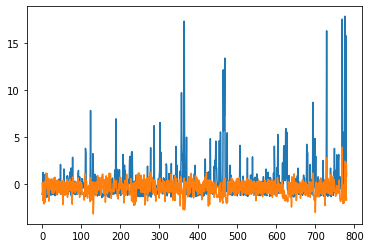

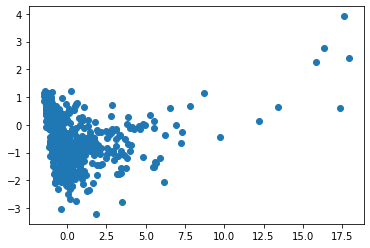

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('pokemonfun.csv').dropna().values

df_std = (df - df.mean()) / (df.std())
df_cov = np.cov(df_std.T, bias=1)

cov_mat = np.cov(df_std.T, bias=0)
print(cov_mat.shape, df_std.shape, eigen_val.shape)

eigen_val, eigen_vectors = np.linalg.eig(cov_mat)
n_components = 2

top_eigen_vectors = eigen_vectors[:,:n_components]
transformed_df = np.matmul(np.array(df_std), top_eigen_vectors)
print(transformed_df.shape, top_eigen_vectors.shape)

plt.figure()
plt.plot(transformed_df)
transformed_df = pd.DataFrame(transformed_df, columns=["PC" + str(i+1) for i in range(n_components)])

plt.figure()
plt.scatter(transformed_df.PC1, transformed_df.PC2)

In [ ]:
from sklearn.decomposition import PCA
import scipy.io as si

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new = pd.DataFrame(X_new)
classes = np.unique(y)

In [ ]:
# Visualization
for i in classes:
    current_x = (X_new.iloc[y == i, :]).to_numpy()
    plt.scatter(current_x[:,0], current_x[:,1])

plt.xlabel('1st Component', size=25)
plt.xlabel('2nd Component', size=25)
# plt.legend(np.uinque(y))
plt.show()